# Gulnar Afrin Ansari

# Data Source

- The dataset is taken from kaggle, please see the link below:
https://www.kaggle.com/datasets/abdallahalidev/plantvillage-dataset

- We have taken Peach dataset which contain 2 folders namely: Peach_Bacterial_spot and Peach_healthy. These folders contain images of leaves (healthy and with bacterial spot).  

- Data License is CC BY-NC-SA 4.0, please see the link below:
https://creativecommons.org/licenses/by-nc-sa/4.0/

- As per the License You are free to:
    Share — copy and redistribute the material in any medium or format
    Adapt — remix, transform, and build upon the material
    The licensor cannot revoke these freedoms as long as you follow the license terms.


# Motivation

Detecting peach diseases (Bacterial spot hole) early can help farmers to take proactive steps to prevent crop losses, improve crop yield, save money, and adopt more sustainable farming practices. This will have a positive impact on their livelihoods and the environment.




# Aim

To build a machine learning model that can accurately classify a peach tree disease based on images of the leaves. 

The Bacterial leaf spot of peach, also known as bacterial shot hole, is a common disease on older peach trees and nectarines. This peach tree leaf spot disease is caused by the bacterium Xanthomonas campestris pv. pruni. Bacterial spot on peach trees result in loss of fruit and the overall malaise of trees caused by recurrent defoliation. Also, these weakened trees are more susceptible to winter injury. [1]


# Importing libraries

In [1]:
import tensorflow as tf 
from tensorflow.keras import models,layers # the models and layers modules are used to define a CNN architecture for image classification. 
import matplotlib.pyplot as plt # help in visualizing the data in graphical notation.
import numpy as np # help in performing mathematical problem easily. 
import warnings 
warnings.filterwarnings('ignore') # Ignore the warnings.

# Data Preprocessing

#### Calling image_dataset_from_directory() which will return a tf.data.Dataset that yields batches of images from the subdirectories class_a and class_b, together with labels 0 and 1 (0 corresponding to class_a and 1 corresponding to class_b).[2]

In [2]:
Peach_dataset = tf.keras.preprocessing.image_dataset_from_directory(
    "Peach",
    shuffle = True,
    image_size = (256,256),
    batch_size = 32
)

Found 2657 files belonging to 2 classes.


Finding :
- Peach dataset have 2 classes with 2657 files. 

#### Let's find out the the names of the classes of Peach_dataset

In [3]:
class_names = Peach_dataset.class_names
class_names

['Peach___Bacterial_spot', 'Peach___healthy']

#### Let's find out the the length of Peach_dataset

In [4]:
len(Peach_dataset)

84

Finding: 

- The actual length of the Peach_dataset is 2657 but after we have created batch of 32 that's why the length is reflecting as 84.

(32, 256, 256, 3)
[0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
[[[138. 139. 157.]
  [139. 140. 158.]
  [140. 141. 159.]
  ...
  [162. 159. 178.]
  [162. 159. 178.]
  [162. 159. 178.]]

 [[140. 141. 159.]
  [140. 141. 159.]
  [142. 143. 161.]
  ...
  [162. 159. 178.]
  [162. 159. 178.]
  [162. 159. 178.]]

 [[141. 142. 160.]
  [142. 143. 161.]
  [143. 144. 162.]
  ...
  [162. 159. 178.]
  [162. 159. 178.]
  [162. 159. 178.]]

 ...

 [[103. 105. 117.]
  [110. 112. 124.]
  [104. 106. 118.]
  ...
  [107. 109. 121.]
  [108. 110. 122.]
  [114. 116. 128.]]

 [[ 90.  92. 104.]
  [101. 103. 115.]
  [ 94.  96. 108.]
  ...
  [102. 104. 116.]
  [103. 105. 117.]
  [110. 112. 124.]]

 [[ 98. 100. 112.]
  [ 95.  97. 109.]
  [ 76.  78.  90.]
  ...
  [103. 105. 117.]
  [104. 106. 118.]
  [113. 115. 127.]]]


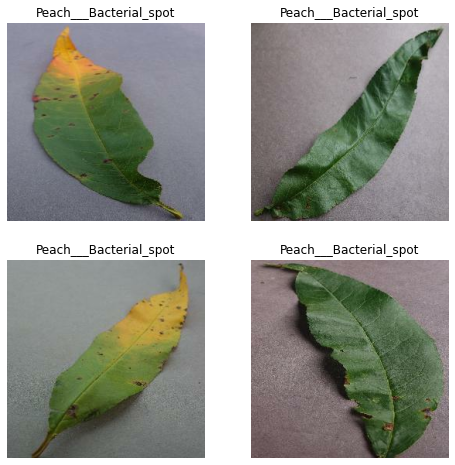

In [5]:
# Let's print some images of the Peach_dataset
for image_batch, label_batch in Peach_dataset.take(1):
    print(image_batch.shape) # provide shape of the batch which contains 32 images that are 256x256 pixels with 3 color channels.
    print(label_batch.numpy()) # convert a batch of labels to a NumPy array which help in computing metrics or plotting the distribution of labels.
    print(image_batch[0].numpy()) # extracting the first image from the batch of images and convert it to a NumPy array.
    plt.figure(figsize=(8,8)) 
    for i in range(4):
        ax = plt.subplot(2,2,i+1)
        plt.imshow(image_batch[i].numpy().astype("uint8")) # extracting the i-th image tensor from the batch and convert it to a NumPy array of type uint8 which help in visualizing the image.
        plt.title(class_names[label_batch[i]]) # retrieving the class name of the i-th image in the batch.
        plt.axis("off")

#### Splitting the data into Train, Validation and Test 

In [6]:
# The partition_dataset function is used to partition a dataset of images loaded from a directory on disk into training, validation, and test sets
def partition_dataset(ds, train_split=0.8, val_split=0.1, test_split=0.1, shuffle=True, shuffle_size=500, seed=12):
    if shuffle:
        ds = ds.shuffle(shuffle_size, seed=seed)
    
    ds_size = len(ds)
    train_size = int(train_split * ds_size)
    val_size = int(val_split * ds_size) 
    
    train_ds = ds.take(train_size)
    val_ds = ds.skip(train_size).take(val_size)
    test_ds = ds.skip(train_size + val_size)
    
    return train_ds, val_ds, test_ds

In [7]:
# Using partition_dataset function, find out the split of Peach_dataset into train_ds, val_ds, test_ds.
train_ds, val_ds, test_ds = partition_dataset(Peach_dataset)

In [8]:
# check the length of train_ds
len(train_ds)

67

In [9]:
# check the length of val_ds
len(val_ds)

8

In [10]:
# check the length of test_ds
len(test_ds)

9

#### Configure the dataset for performance

- Dataset.cache keeps the images in memory after they're loaded off disk during the first epoch. This will ensure the dataset does not become a bottleneck while training your model. If your dataset is too large to fit into memory, you can also use this method to create a performant on-disk cache. [3]
- Dataset.prefetch overlaps data preprocessing and model execution while training.[3]

In [11]:
train_ds = train_ds.cache().shuffle(500).prefetch(buffer_size=tf.data.AUTOTUNE)
val_ds = val_ds.cache().shuffle(500).prefetch(buffer_size=tf.data.AUTOTUNE)
test_ds = test_ds.cache().shuffle(500).prefetch(buffer_size=tf.data.AUTOTUNE)

#### Standardize the data 
- The RGB channel values are in the [0, 255] range which is not ideal for a neural network. Hence by using 'Rescaling' we can standardize values to be in the [0, 1] range.

- The Input pixel values can be of any range which require 'Resizing' to get uniform size. 

In [12]:
resize_and_reshape= tf.keras.Sequential([
    layers.experimental.preprocessing.Resizing(256,256),
    layers.experimental.preprocessing.Rescaling(1.0/255)    
])

#### Data Augmentation

- This technique to increase the diversity of the training set by applying random (but realistic) transformations, such as image rotation and flipping. [4]

In [13]:
data_augmentation = tf.keras.Sequential([
    layers.experimental.preprocessing.RandomFlip('horizontal_and_vertical'),
    layers.experimental.preprocessing.RandomRotation(0.2)    
])

# Building the CNN Model

#### The Sequential model

The 'models' and 'layers' modules are used to define a CNN architecture for image classification. The 'Conv2D' and 'MaxPooling2D' layers are used to perform feature extraction, while the 'Dense' layer is used to perform classification. 

A Sequential model is appropriate for a plain stack of layers where each layer has exactly one input tensor and one output tensor. [5]

In [14]:
n_classes= 2
model = models.Sequential([
    resize_and_reshape,
    data_augmentation,
    layers.Conv2D(32, kernel_size = (3,3), activation='relu', input_shape = (256,256,3)),
    layers.MaxPooling2D(pool_size=(2,2)),
    layers.Conv2D(64, kernel_size = (3,3), activation='relu'),
    layers.MaxPooling2D(pool_size=(2,2)),
    layers.Conv2D(128, kernel_size = (3,3), activation='relu'),
    layers.MaxPooling2D(pool_size=(2,2)),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(64, activation='relu'),
    layers.Dense(n_classes, activation='sigmoid')                  
])

model.build(input_shape = (32, 256,256,3) )

In [15]:
# Check the summary of the model, the flow of the layers and the Trainable params.
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential (Sequential)     (32, 256, 256, 3)         0         
                                                                 
 sequential_1 (Sequential)   (32, 256, 256, 3)         0         
                                                                 
 conv2d (Conv2D)             (32, 254, 254, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2D  (32, 127, 127, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (32, 125, 125, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (32, 62, 62, 64)         0         
 2D)                                                  

# Training the Model

#### The model.compile function is used to compile the model with a loss function and optimizer.
#### Adam 
- Adam is an optimization algorithm that can be used instead of the classical stochastic gradient descent procedure to update network weights iterative based in training data.[6]

#### SparseCategoricalCrossentropy
- Computes the crossentropy loss between the labels and predictions [7]
- The from_logits=False argument indicates that the model is returning the output probabilities rather than the logits(laog value).

In [16]:
model.compile(
    optimizer = 'adam', 
    loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
    metrics = ['accuracy']
)

In [17]:
# fit the model using train_ds and check the validation on val_ds.
history = model.fit(
    train_ds, 
    epochs= 15, 
    batch_size = 32,
    verbose = 1,
    validation_data= val_ds 
)

Epoch 1/15
67/67 [==============================] - 148s 2s/step - loss: 0.2248 - accuracy: 0.9238 - val_loss: 0.1430 - val_accuracy: 0.9648
Epoch 2/15
67/67 [==============================] - 149s 2s/step - loss: 0.1194 - accuracy: 0.9522 - val_loss: 0.2896 - val_accuracy: 0.8750
Epoch 3/15
67/67 [==============================] - 141s 2s/step - loss: 0.0738 - accuracy: 0.9730 - val_loss: 0.0711 - val_accuracy: 0.9727
Epoch 4/15
67/67 [==============================] - 142s 2s/step - loss: 0.0485 - accuracy: 0.9830 - val_loss: 0.0381 - val_accuracy: 0.9805
Epoch 5/15
67/67 [==============================] - 142s 2s/step - loss: 0.0479 - accuracy: 0.9830 - val_loss: 0.0446 - val_accuracy: 0.9844
Epoch 6/15
67/67 [==============================] - 143s 2s/step - loss: 0.0527 - accuracy: 0.9806 - val_loss: 0.0605 - val_accuracy: 0.9766
Epoch 7/15
67/67 [==============================] - 141s 2s/step - loss: 0.0562 - accuracy: 0.9825 - val_loss: 0.0253 - val_accuracy: 0.9922
Epoch 8/15
67

In [18]:
# checking for the keys which history varaible holds.
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

In [19]:
# checking for the accuracy of the training data 
history.history['accuracy']

[0.9238049983978271,
 0.9522006511688232,
 0.9730241298675537,
 0.9829626083374023,
 0.9829626083374023,
 0.9805963039398193,
 0.9824893474578857,
 0.9843823909759521,
 0.9848556518554688,
 0.9848556518554688,
 0.985802173614502,
 0.9867486953735352,
 0.9872219562530518,
 0.9895882606506348,
 0.990534782409668]

# Evaluating the Model

In [20]:
# Once our model is trained , we are good to evaluate it on Test dataset (test_ds).
evaluation_scores = model.evaluate(test_ds)
evaluation_scores

9/9 [==============================] - 6s 468ms/step - loss: 0.0173 - accuracy: 0.9965


[0.017296046018600464, 0.9965277910232544]

Findings: 

The accuracy is good on test_ds which implies that our model is performig well.

# Data Visualization

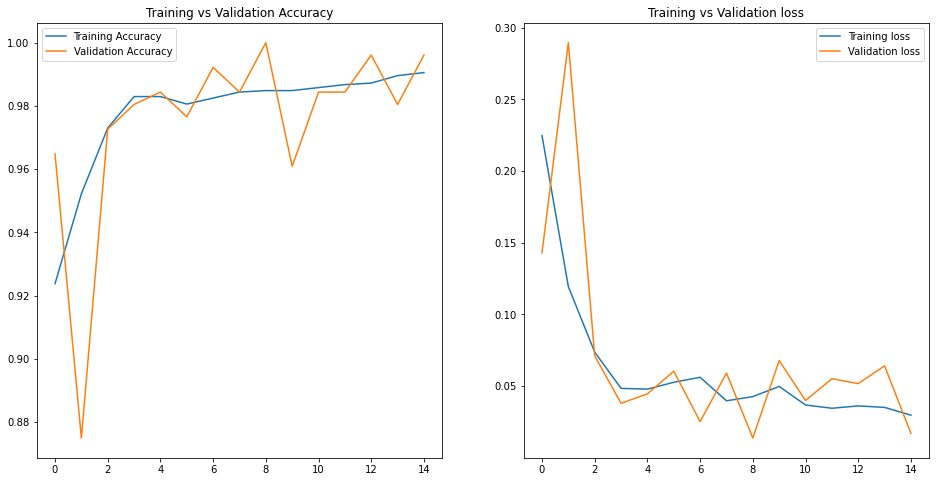

In [21]:
# Let's visualize the Training vs Validation Accuracy and Training vs Validation loss
accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

plt.figure(figsize=(16,8))
plt.subplot(1,2,1)
plt.plot(range(15), accuracy, label = 'Training Accuracy')
plt.plot(range(15), val_accuracy, label = 'Validation Accuracy')
plt.title('Training vs Validation Accuracy')
plt.legend()

plt.subplot(1,2,2)
plt.plot(range(15), loss, label = 'Training loss')
plt.plot(range(15), val_loss, label = 'Validation loss')
plt.title('Training vs Validation loss')
plt.legend()

plt.show()



Findings: 

- Training and Validation Accuracy : As the epochs is increasing, we are receiving good accuracy. 

- Training and Validation loss : As the epochs is increasing, loss in back propagation is reducing. 

# Predicting Peach Disease

Image to predict
Actual label: Peach___Bacterial_spot
1/1 [==============================] - 1s 589ms/step
Predicted label: Peach___Bacterial_spot


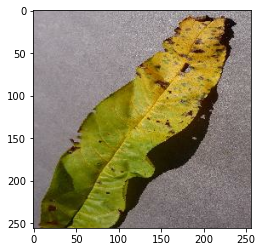

In [22]:
# Lets do the prediction on 1 image if it has Bacterial_spot or not.

for images_batch, labels_batch in test_ds.take(1):
    image = images_batch[0].numpy().astype('uint8')
    label = labels_batch[0].numpy()
    
    print('Image to predict')
    plt.imshow(image)
    print("Actual label:", class_names[label])    
    batch_prediction = model.predict(images_batch)
    print("Predicted label:", class_names[np.argmax(batch_prediction[0])]) # np.argmax is used to provide the index of the maximum probability of class which is provided by softmax function.

In [23]:
# create a predict() function so that we can get the predicted_class and confidence of the image. 
def predict(model, img):
    img_array = tf.keras.preprocessing.image.img_to_array(images[i].numpy())
    img_array = tf.expand_dims(img_array, 0)
    
    predictions = model.predict(img_array)
    predicted_class = class_names[np.argmax(predictions[0])]
    confidence = round(100*(np.max(predictions[0])), 2 )
    return predicted_class, confidence
    

1/1 [==============================] - 0s 38ms/step


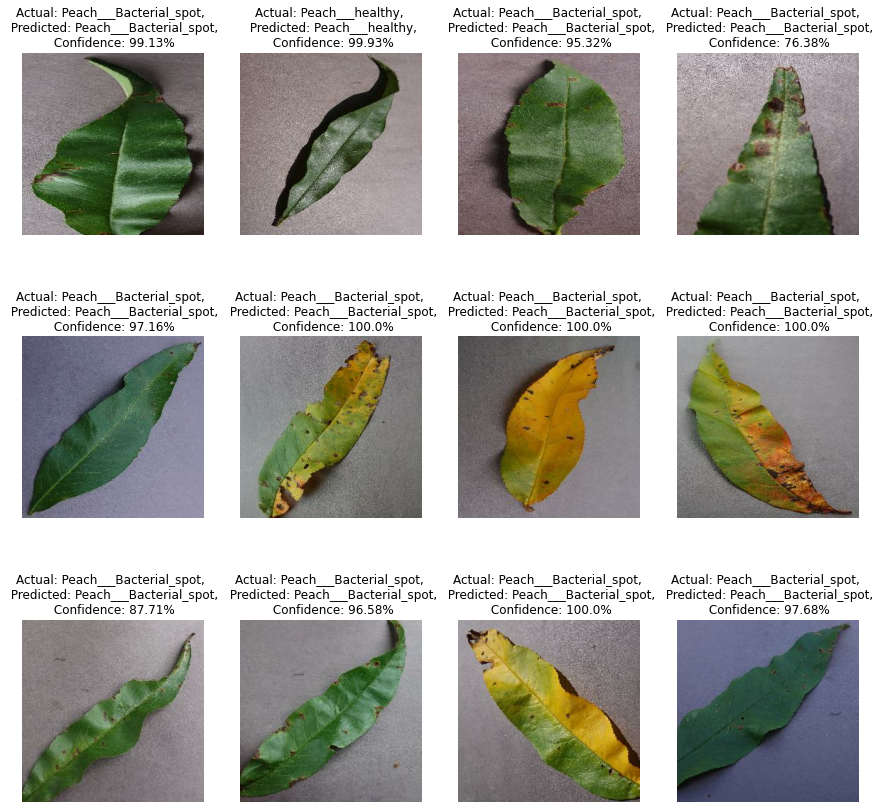

In [24]:
# Here we have taken batch 2 and checking the prediction on its 12 images.
plt.figure(figsize=(15,20))
for images, labels in test_ds.take(2):    
    for i in range(12):
        ax = plt.subplot(4,4,i+1)
        plt.imshow(images[i].numpy().astype("uint8"))
        predicted_class, confidence = predict(model, images[i].numpy())
        actual_class = class_names[labels[i]]
        plt.axis("off")
        plt.title(f"Actual: {actual_class}, \n Predicted: {predicted_class},\n Confidence: {confidence}%")
        

Findings:

All the 12 images provide good prediction.

# Saving the version of the model.

In [25]:
# Its a good practice to save the version of the model,
# In future, if we need to upgrade our current model then we can upgrade it and save it as version 2.
model_version = 1
model.save(f"./models/{model_version}")

INFO:tensorflow:Assets written to: ./models/1\assets


INFO:tensorflow:Assets written to: ./models/1\assets


# Trials

Experimenting by reducing the layers, changing the activation function and removing the data_augmentation in the Sequential model.

## Trial 1 - model1 

#### Reducing the number of layers with no data_augmentation  

 

In [26]:
model1 = models.Sequential([
    resize_and_reshape,
    layers.Conv2D(32, kernel_size = (3,3), activation='relu', input_shape = (256,256,3)),
    layers.MaxPooling2D(pool_size=(2,2)),
    layers.Flatten(),
    layers.Dense(32, activation='relu'),
    layers.Dense(2, activation='sigmoid')                  
])

model1.build(input_shape = (32, 256,256,3) )

In [27]:
model1.compile(optimizer = 'adam', loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False), metrics = ['accuracy'])

In [28]:
history = model1.fit(train_ds, epochs= 10, batch_size = 32, verbose = 1, validation_data= val_ds)

Epoch 1/10
67/67 [==============================] - 57s 842ms/step - loss: 1.4253 - accuracy: 0.8410 - val_loss: 0.6540 - val_accuracy: 0.8633
Epoch 2/10
67/67 [==============================] - 53s 794ms/step - loss: 0.6329 - accuracy: 0.8661 - val_loss: 0.6133 - val_accuracy: 0.8633
Epoch 3/10
67/67 [==============================] - 54s 800ms/step - loss: 0.5951 - accuracy: 0.8661 - val_loss: 0.5787 - val_accuracy: 0.8633
Epoch 4/10
67/67 [==============================] - 54s 812ms/step - loss: 0.5626 - accuracy: 0.8661 - val_loss: 0.5491 - val_accuracy: 0.8633
Epoch 5/10
67/67 [==============================] - 54s 809ms/step - loss: 0.5347 - accuracy: 0.8661 - val_loss: 0.5239 - val_accuracy: 0.8633
Epoch 6/10
67/67 [==============================] - 52s 779ms/step - loss: 0.5113 - accuracy: 0.8661 - val_loss: 0.5026 - val_accuracy: 0.8633
Epoch 7/10
67/67 [==============================] - 55s 817ms/step - loss: 0.4917 - accuracy: 0.8661 - val_loss: 0.4848 - val_accuracy: 0.8633

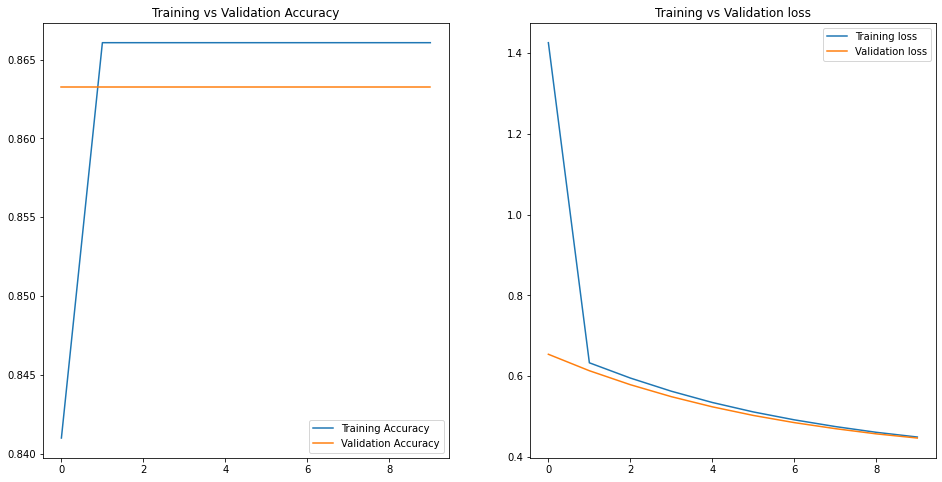

In [29]:
accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

plt.figure(figsize=(16,8))
plt.subplot(1,2,1)
plt.plot(range(10), accuracy, label = 'Training Accuracy')
plt.plot(range(10), val_accuracy, label = 'Validation Accuracy')
plt.title('Training vs Validation Accuracy')
plt.legend()

plt.subplot(1,2,2)
plt.plot(range(10), loss, label = 'Training loss')
plt.plot(range(10), val_loss, label = 'Validation loss')
plt.title('Training vs Validation loss')
plt.legend()

plt.show()

 Finding:
 - As per the above graph Training vs Validation graph for accuracy and loss reflects that the data is overfitting.

## Trial 2 - model2 

#### Reducing the number of layers with no data_augmentation and changing the input activation function to tanh. 

In [30]:
model2 = models.Sequential([
    resize_and_reshape,
    layers.Conv2D(32, kernel_size = (3,3), activation='tanh', input_shape = (256,256,3)),
    layers.MaxPooling2D(pool_size=(2,2)),
    layers.Flatten(),
    layers.Dense(32, activation='tanh'),
    layers.Dense(2, activation='sigmoid')                  
])

model2.build(input_shape = (32, 256,256,3) )

In [31]:
model2.compile(optimizer = 'adam', loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False), metrics = ['accuracy'])

In [32]:
history = model2.fit(train_ds, epochs= 10, batch_size = 32, verbose = 1, validation_data= val_ds)

Epoch 1/10
67/67 [==============================] - 64s 950ms/step - loss: 0.7685 - accuracy: 0.8599 - val_loss: 0.5293 - val_accuracy: 0.8633
Epoch 2/10
67/67 [==============================] - 66s 988ms/step - loss: 0.4208 - accuracy: 0.8661 - val_loss: 0.3992 - val_accuracy: 0.8633
Epoch 3/10
67/67 [==============================] - 64s 961ms/step - loss: 0.3944 - accuracy: 0.8661 - val_loss: 0.3997 - val_accuracy: 0.8633
Epoch 4/10
67/67 [==============================] - 62s 919ms/step - loss: 0.3942 - accuracy: 0.8661 - val_loss: 0.3990 - val_accuracy: 0.8633
Epoch 5/10
67/67 [==============================] - 61s 904ms/step - loss: 0.3944 - accuracy: 0.8661 - val_loss: 0.4012 - val_accuracy: 0.8633
Epoch 6/10
67/67 [==============================] - 61s 912ms/step - loss: 0.3953 - accuracy: 0.8661 - val_loss: 0.3990 - val_accuracy: 0.8633
Epoch 7/10
67/67 [==============================] - 59s 888ms/step - loss: 0.3949 - accuracy: 0.8661 - val_loss: 0.4012 - val_accuracy: 0.8633

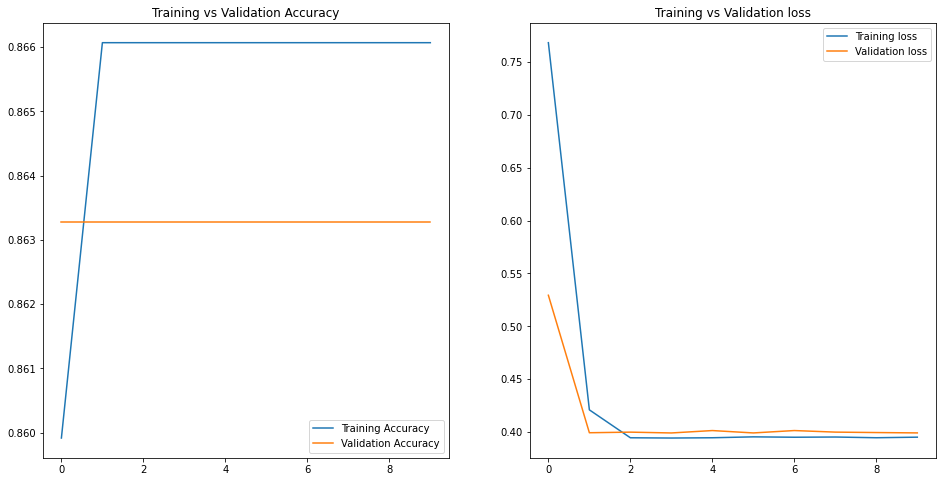

In [33]:
accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

plt.figure(figsize=(16,8))
plt.subplot(1,2,1)
plt.plot(range(10), accuracy, label = 'Training Accuracy')
plt.plot(range(10), val_accuracy, label = 'Validation Accuracy')
plt.title('Training vs Validation Accuracy')
plt.legend()

plt.subplot(1,2,2)
plt.plot(range(10), loss, label = 'Training loss')
plt.plot(range(10), val_loss, label = 'Validation loss')
plt.title('Training vs Validation loss')
plt.legend()

plt.show()

 Finding:
 - As per the above graph Training vs Validation graph for accuracy and loss reflects that the data is overfitting.

# Saving the version of the model.

In [34]:
# Its a good practice to save the version of the model,
# In future, if we need to upgrade our current model then we can upgrade it and save it as version 2.
model_version = 1
model.save(f"./models/{model_version}")

INFO:tensorflow:Assets written to: ./models/1\assets


INFO:tensorflow:Assets written to: ./models/1\assets


# Conclusion

We have successfully built a machine learning model by the name ‘model’ and the version as ‘1’.

The next step is to build an API using this model and upload it on the mobile phone.

Once the API is ready, farmers can download it from their mobile’s play store. In order to use the app, they need to click the images of the leaves and the application will tell them if the peach tree has the disease (Bacterial spot hole) or not.

We have performed 2 more trials to check if the other models(model1 and model 2) is better than our earlier ‘model’.

In ‘model 1’ we have reduced the number of layers and there is no data_augmentation as well. However, the graph shows that the data is overfitting. 
In ‘model 2’ we have reduced the number of layers and there is no data_augmentation as well. We have also changed the input activation function to ‘tanh’. However, the graph shows that the data is overfitting.

To improve the results of a sequential model,  we need to consider the following:

•	Increase the amount of training data.

•	Performing feature engineering

•	Adjust the model architecture by adding more layers, increasing or decreasing the number of neurons per layer, or using different types of activation functions.

•	Experiment with different batch sizes, optimizer functions, and other hyperparameters to find the optimal settings for your model.


# Referencing 

1. Bacterial Leaf Spot Of Peach - Tips On Controlling Leaf Spot On Peaches -  https://www.gardeningknowhow.com/edible/fruits/peach/bacterial-spot-on-peach-trees.htm

2. tf.keras.utils.image_dataset_from_directory : TensorFlow v2.12.0 - https://www.tensorflow.org/api_docs/python/tf/keras/utils/image_dataset_from_directory

3. Load and preprocess images:TensorFlow Core - https://www.tensorflow.org/tutorials/load_data/images#load_using_keraspreprocessing

4. Data augmentation:TensorFlow Core - https://www.tensorflow.org/tutorials/images/data_augmentation

5. The Sequential model:TensorFlow Core - https://www.tensorflow.org/guide/keras/sequential_model

6. Gentle Introduction to the Adam Optimization Algorithm for Deep Learning - https://machinelearningmastery.com/adam-optimization-algorithm-for-deep-learning/

7. tf.keras.losses.SparseCategoricalCrossentropy:TensorFlow v2.12.0 - https://www.tensorflow.org/api_docs/python/tf/keras/losses/SparseCategoricalCrossentropy

